In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Reading the dataset
train = pd.read_csv("train.csv")

In [3]:
# DataFrame EXploration

In [4]:
train.shape

(54808, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
# Data Exploration via graphical method

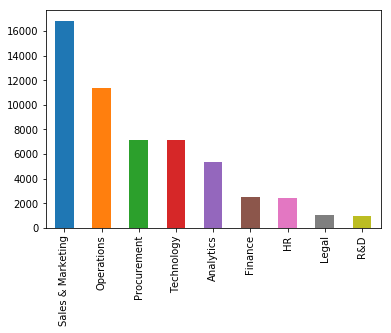

In [9]:
#  Department variable
train['department'].value_counts().plot(kind = 'bar')

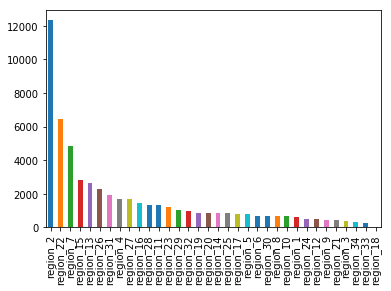

In [10]:
# Region variable
train['region'].value_counts().plot(kind = 'bar')

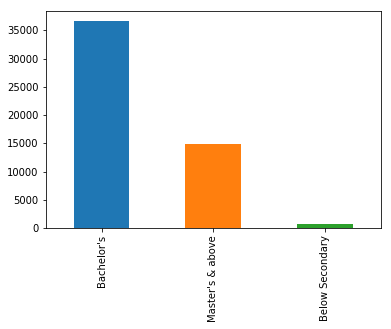

In [11]:
# Education variable
train['education'].value_counts().plot(kind = 'bar')

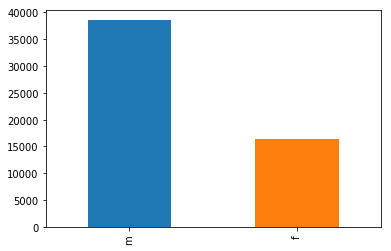

In [12]:
# Gender variable
train['gender'].value_counts().plot(kind = 'bar')

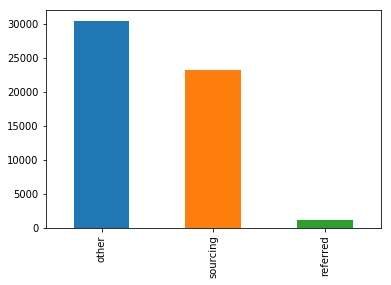

In [13]:
# Recruitment Channel variable
train['recruitment_channel'].value_counts().plot(kind = 'bar')

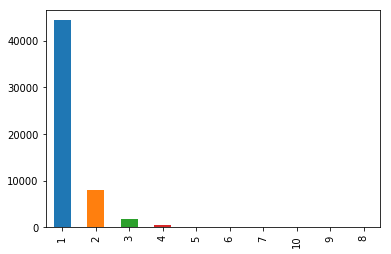

In [14]:
# No of Training variable
train['no_of_trainings'].value_counts().plot(kind = 'bar')

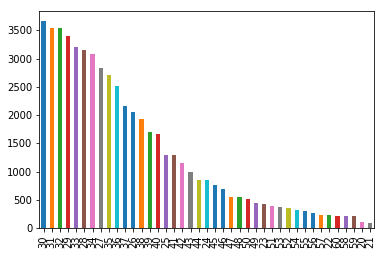

In [15]:
# Age
train['age'].value_counts().plot(kind = 'bar')

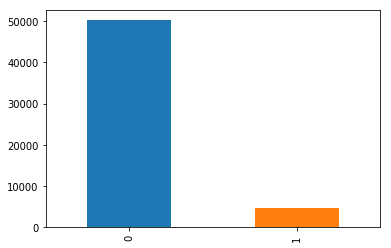

In [16]:
# Target variable
train['is_promoted'].value_counts().plot(kind = 'bar')

From above diagram it look likes highly Imbalanced datasets, before implementing algorithm we need to take care of this imbalance. Before that we need to perform few prerequisite--- i) missing value treatment
                                                             ii) categorical to numerical conversion

In [17]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [18]:
from scipy.stats import mode as mode

In [19]:
train['education'].replace(np.NaN, "Bachelor's", inplace=True)

In [20]:
train['previous_year_rating'].replace(np.NaN, mode(train['previous_year_rating']).mode[0], inplace=True)

In [21]:
# Relation/Pattern finding with Target Variable

In [22]:
 pd.crosstab(train.department, train.is_promoted)

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


In [23]:
 pd.crosstab(train.region, train.is_promoted)

is_promoted,0,1
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230
region_14,765,62
region_15,2586,222
region_16,1363,102
region_17,687,109


In [24]:
 pd.crosstab(train.education, train.is_promoted)

is_promoted,0,1
education,,
Bachelor's,35948,3130
Below Secondary,738,67
Master's & above,13454,1471


In [25]:
 pd.crosstab(train.gender, train.is_promoted)

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [26]:
 pd.crosstab(train.recruitment_channel, train.is_promoted)

is_promoted,0,1
recruitment_channel,,
other,27890,2556
referred,1004,138
sourcing,21246,1974


In [27]:
 pd.crosstab(train.no_of_trainings, train.is_promoted)

is_promoted,0,1
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


In [28]:
 pd.crosstab(train.age, train.is_promoted)

is_promoted,0,1
age,,
20,109,4
21,93,5
22,213,18
23,394,34
24,775,70
25,1230,69
26,1897,163
27,2566,261
28,2839,308


In [29]:
 pd.crosstab(train.previous_year_rating, train.is_promoted)

is_promoted,0,1
previous_year_rating,,
1.0,6135,88
2.0,4044,181
3.0,21048,1694
4.0,9093,784
5.0,9820,1921


In [30]:
 pd.crosstab(train.length_of_service, train.is_promoted)

is_promoted,0,1
length_of_service,,
1,4170,377
2,6089,595
3,6424,609
4,6238,598
5,5357,475
6,4333,401
7,5087,464
8,2614,269
9,2400,229


In [31]:
 pd.crosstab(train['KPIs_met >80%'], train.is_promoted)

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


In [32]:
 pd.crosstab(train['awards_won?'], train.is_promoted)

is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


In [33]:
 pd.crosstab(train.avg_training_score, train.is_promoted)

is_promoted,0,1
avg_training_score,,
39,2,0
40,5,0
41,25,1
42,60,2
43,169,7
44,325,10
45,650,31
46,1100,36
47,1667,79


In [34]:
 pd.crosstab(train['KPIs_met >80%'],train['awards_won?'], values = train.is_promoted, aggfunc=np.mean)

awards_won?,0,1
KPIs_met >80%,,
0,0.033271,0.541950
1,0.159354,0.386007


In [35]:
 pd.crosstab(train.education,train['awards_won?'], values = train.is_promoted, aggfunc=np.mean)

awards_won?,0,1
education,,
Bachelor's,0.072187,0.410734
Below Secondary,0.080910,0.214286
Master's & above,0.088465,0.527697


In [36]:
 pd.crosstab(train.education,train['KPIs_met >80%'], values = train.is_promoted, aggfunc=np.mean)

KPIs_met >80%,0,1
education,,
Bachelor's,0.036768,0.161321
Below Secondary,0.045549,0.139752
Master's & above,0.046806,0.190512


In [37]:
 pd.crosstab(train.education,train.no_of_trainings, values = train.is_promoted, aggfunc=np.mean)

no_of_trainings,1,2,3,4,5,6,7,8,9,10
education,,,,,,,,,,
Bachelor's,0.083073,0.070857,0.063623,0.054496,0.029703,0.054054,0.0,0.0,0.0,0.0
Below Secondary,0.089783,0.046296,0.076923,0.083333,NaN,NaN,NaN,NaN,NaN,NaN
Master's & above,0.100759,0.091633,0.084788,0.056180,0.000000,0.000000,0.0,0.0,NaN,0.0


In [38]:
 pd.crosstab(train.education,train.avg_training_score, values = train.is_promoted, aggfunc=np.mean)

avg_training_score,39,40,41,42,43,44,45,46,47,48,...,90,91,92,93,94,95,96,97,98,99
education,,,,,,,,,,,,,,,,,,,,,
Bachelor's,0.0,0.0,0.047619,0.022727,0.046154,0.036585,0.037475,0.033175,0.040644,0.035176,...,0.436508,0.646341,0.816667,0.890909,0.947368,1.0,1.0000,1.0,1.0,1.0
Below Secondary,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,...,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.0000,1.0,NaN,NaN
Master's & above,NaN,0.0,0.000000,0.055556,0.022222,0.011628,0.070588,0.028169,0.056206,0.052298,...,0.396552,0.636364,0.820513,0.888889,1.000000,1.0,0.9375,1.0,1.0,1.0


In [39]:
 pd.crosstab(train.education,train.previous_year_rating, values = train.is_promoted, aggfunc=np.mean)

previous_year_rating,1.0,2.0,3.0,4.0,5.0
education,,,,,
Bachelor's,0.014615,0.039047,0.070265,0.079004,0.152709
Below Secondary,0.000000,0.111111,0.083789,0.050000,0.133333
Master's & above,0.013142,0.051477,0.085855,0.081298,0.189704


In [40]:
 pd.crosstab(train.gender,train.previous_year_rating, values = train.is_promoted, aggfunc=np.mean)

previous_year_rating,1.0,2.0,3.0,4.0,5.0
gender,,,,,
f,0.015653,0.057330,0.073038,0.078038,0.177124
m,0.013591,0.036951,0.075105,0.079971,0.157636


In [41]:
 pd.crosstab(train.gender,train.avg_training_score, values = train.is_promoted, aggfunc=np.mean)

avg_training_score,39,40,41,42,43,44,45,46,47,48,...,90,91,92,93,94,95,96,97,98,99
gender,,,,,,,,,,,,,,,,,,,,,
f,NaN,0.0,0.000000,0.000000,0.023256,0.060606,0.026667,0.023166,0.051771,0.02682,...,0.804878,0.888889,1.00,1.000000,1.000000,1.0,1.00000,1.0,1.0,1.0
m,0.0,0.0,0.047619,0.035714,0.045113,0.022305,0.050847,0.034208,0.043510,0.04282,...,0.319444,0.606061,0.76,0.852459,0.957447,1.0,0.96875,1.0,1.0,1.0


# Feature Engineering

In [42]:
# creating group as per training_score

train_score = []


for score in train['avg_training_score']:
    if score <= 40 :
        train_score.append(0)
    elif score < 60 :
        train_score.append(1)
    elif score < 80 :
        train_score.append(2)    
    else:
        train_score.append(3)
        
# Create a column from the list
train['train_score'] = train_score

In [43]:
# Categorical to Numerical conversion

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train.gender = labelencoder.fit_transform(train.gender)
train.education = labelencoder.fit_transform(train.education)

In [45]:
# Independent Variable & Dependent Variable
X = train.loc[: , ['education','gender','previous_year_rating','KPIs_met >80%','awards_won?','train_score']]
Y = train.loc[: , ['is_promoted']]

In [46]:
# important libraries for modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import recall_score,precision_score,confusion_matrix,accuracy_score,f1_score
from imblearn.combine import SMOTEENN

In [47]:
x_train, x_val, y_train, y_val = train_test_split(X, Y,test_size = .2,random_state=12)

In [48]:
# OverSampling

In [49]:
smt = SMOTEENN(ratio='minority',random_state=50)

In [50]:
X_smt, y_smt = smt.fit_sample(x_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
RF = RandomForestClassifier(n_estimators=3000,bootstrap: True,max_depth: 80,max_feature: 3,min_samples_leaf: 5,
                          min_samples_split: 12,oob_score=True,verbose=2,random_state=42, n_jobs = -1)
RF.fit(X_smt,y_smt.values.ravel())
scores = cross_val_score(RF, X_smt, y_smt.values.ravel(), cv=5, scoring='f1')
y_pred = RF.predict(x_val)

In [ ]:
p_s = precision_score(y_val,y_pred)
r_s = recall_score(y_val,y_pred)
cm = confusion_matrix(y_val,y_pred)
f1 = f1_score(y_val, y_pred)

In [ ]:
cm

In [ ]:
f1

In [ ]:
p_s

In [ ]:
r_s

# Predicting Test set

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
# creating group as per training_score

train_score = []


for score in test['avg_training_score']:
    if score <= 40 :
        train_score.append(0)
    elif score < 60 :
        train_score.append(1)
    elif score < 80 :
        train_score.append(2)    
    else:
        train_score.append(3)
        
# Create a column from the list
test['train_score'] = train_score

In [ ]:
test['education'].replace(np.NaN, "Bachelor's", inplace = True)
test['previous_year_rating'].replace(np.NaN, mode(test['previous_year_rating']).mode[0], inplace=True)

In [ ]:
labelencoder = LabelEncoder()
test.gender = labelencoder.fit_transform(test.gender)
test.education = labelencoder.fit_transform(test.education)

In [ ]:
X_1 = test.loc[: , ['education','gender','previous_year_rating','KPIs_met >80%','awards_won?','train_score']]

In [ ]:
RF.fit(x_smt, y_smt.values.ravel())
is_promoted = RF.predict(X_1)

In [ ]:
pd.DataFrame({"employee_id":test.employee_id , "is_promoted":is_promoted}).set_index("employee_id").to_csv("submission4.csv")

# Thank You